<a href="https://colab.research.google.com/github/2403a52264-debug/NLP/blob/main/2403A52264_NLP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import nltk
import spacy
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
!pip install nltk spacy scikit-learn matplotlib pandas
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df.tail()

,review,sentiment
32420,"""Nothin'. There ain't nothing' in Room 237. Bu...",positive
32421,This is by far the worst adaptation of Jane Ey...,negative
32422,Why do I watch movies like this ? - other than...,negative
32423,I liked nearly all the movies in the Dirty Har...,positive
32424,It's clear that for this film they wanted to h...,negative


In [37]:
print(df['sentiment'].value_counts())

sentiment
positive    16215
negative    16210
Name: count, dtype: int64


In [42]:
positive_reviews = positive_reviews_full[:1000]
negative_reviews = negative_reviews_full[:1000]

In [39]:
stop_words = stopwords.words('english')

In [21]:
vectorizer_pos = TfidfVectorizer(
    stop_words=stop_words,
    lowercase = True,
    max_features=2000
    )

In [43]:
tfidf_pos = vectorizer_pos.fit_transform(positive_reviews)
pos_scores = tfidf_pos.toarray()
pos_words = vectorizer_pos.get_feature_names_out()

pos_avg = pos_scores.mean(axis=0)

In [44]:
pos_dict = dict(zip(pos_words, pos_avg))

top_pos = sorted(pos_dict.items(), key=lambda x: x[1], reverse=True)[:15]

pos_terms, pos_values = zip(*top_pos)

print("Top 15 Positive TF-IDF Words:")
print(pos_terms)

Top 15 Positive TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'good', 'great', 'story', 'see', 'would', 'well', 'really', 'time', 'love', 'also')


In [45]:

vectorizer_neg = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_features=2000
)

tfidf_neg = vectorizer_neg.fit_transform(negative_reviews)

neg_scores = tfidf_neg.toarray()
neg_words = vectorizer_neg.get_feature_names_out()

neg_avg = neg_scores.mean(axis=0)



In [46]:

neg_dict = dict(zip(neg_words, neg_avg))

top_neg = sorted(neg_dict.items(), key=lambda x: x[1], reverse=True)[:15]

neg_terms, neg_values = zip(*top_neg)

print("Top 15 Negative TF-IDF Words:")
print(neg_terms)

Top 15 Negative TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'bad', 'good', 'even', 'would', 'really', 'see', 'could', 'story', 'time', 'get')


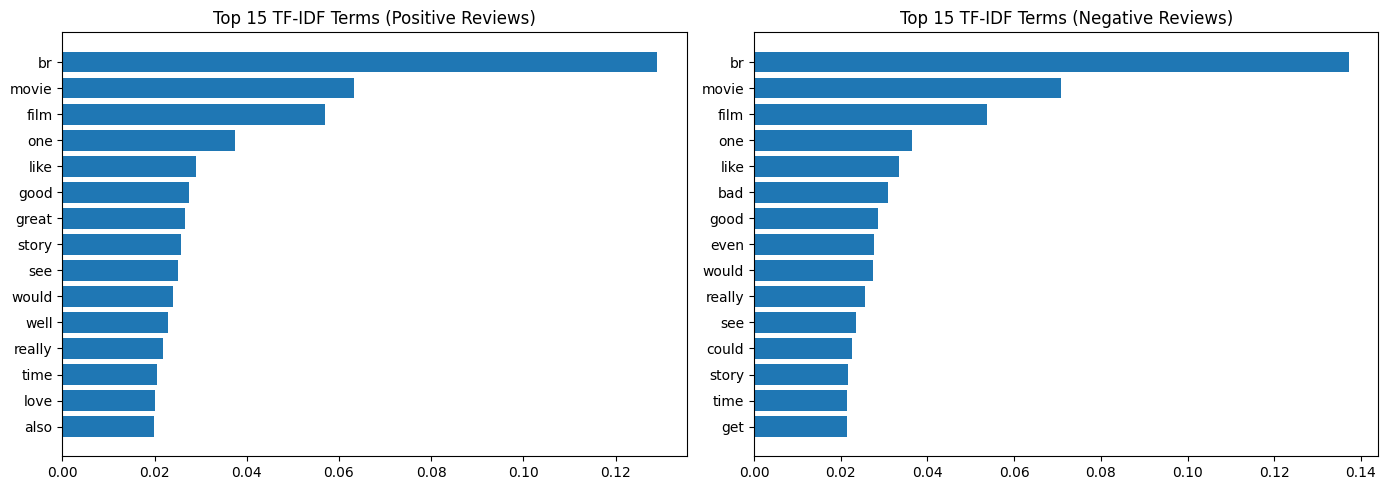

In [47]:

plt.figure(figsize=(14,5))

# at this point i am showing Positive
plt.subplot(1,2,1)
plt.barh(pos_terms, pos_values)
plt.title("Top 15 TF-IDF Terms (Positive Reviews)")
plt.gca().invert_yaxis()

# at this point i am showing Negative
plt.subplot(1,2,2)
plt.barh(neg_terms, neg_values)
plt.title("Top 15 TF-IDF Terms (Negative Reviews)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()